# EDA (Exploratory Data Analysis)

Cargas Librerias

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

color = sns.color_palette()
pd.set_option('display.max_columns',20)

Cargar bases de datos 

In [2]:


#Folder que contiene el proyecto
folder='C:/Data/proyectos/proyecto1/'
#Cargar datos
order_products=pd.read_csv(folder+'order_products_all.csv')
orders=pd.read_csv(folder+'orders.csv')
aisles=pd.read_csv(folder+'aisles.csv')
departments=pd.read_csv(folder+'departments.csv')
products=pd.read_csv(folder+'products.csv')

## Analisis Descriptivo

### Exploracion Inicial y Diagnóstico de los datos
**Aisles.csv** es la base de datos de los pasillos contiene un ID y un nombre de cada pasillo
en total 134

In [3]:
for i in aisles.columns:
    print('valores faltantes en ',i, sum(aisles[i].isna()))

valores faltantes en  aisle_id 0
valores faltantes en  aisle 0


In [4]:
aisles.shape


(134, 2)

In [5]:
aisles.columns

Index(['aisle_id', 'aisle'], dtype='object')

In [6]:
aisles.sample(5)

,aisle_id,aisle
123,124,spirits
114,115,water seltzer sparkling water
6,7,packaged meat
53,54,paper goods
100,101,air fresheners candles


**departments.csv** es la base de datos de los departamentos contiene un ID y un nombre de cada departamento en total 21, es una clasificacion más general que la de pasillo.

In [7]:
for i in departments.columns:
    print('valores faltantes en ',i, sum(departments[i].isna()))

valores faltantes en  department_id 0
valores faltantes en  department 0


In [8]:
departments.shape

(21, 2)

In [9]:
departments.columns

Index(['department_id', 'department'], dtype='object')

In [10]:
departments.sample(5)

,department_id,department
3,4,produce
9,10,bulk
10,11,personal care
17,18,babies
13,14,breakfast


**products.csv** es la base de datos de productos, tiene las 49688 clases de productos que hay, con sus respectivos pasillo y departamento asociados

In [11]:
for i in products.columns:
    print('valores faltantes en ',i, sum(products[i].isna()))

valores faltantes en  product_id 0
valores faltantes en  product_name 0
valores faltantes en  aisle_id 0
valores faltantes en  department_id 0


In [12]:
products.shape

(49688, 4)

In [13]:
products.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

In [14]:
products.sample(5)

,product_id,product_name,aisle_id,department_id
20080,20081,Sea Salt Mini Popcorn,107,19
18141,18142,SkinTherapy Moisturizing Shave Gel,55,11
38289,38290,Vegan Crunchy Peanut Butter,3,19
37424,37425,Cafe Steamers Cajun Style Chicken & Shrimp,38,1
21646,21647,PartySmart Single Dose Herbal Supplement,47,11


In [15]:
products=products.merge(departments, left_on='department_id',right_on='department_id')

In [16]:
products=products.merge(aisles, left_on='aisle_id',right_on='aisle_id')

In [17]:
products.department.value_counts()

personal care      6563
snacks             6264
pantry             5371
beverages          4365
frozen             4007
dairy eggs         3449
household          3085
canned goods       2092
dry goods pasta    1858
produce            1684
bakery             1516
deli               1322
missing            1258
international      1139
breakfast          1115
babies             1081
alcohol            1054
pets                972
meat seafood        907
other               548
bulk                 38
Name: department, dtype: int64

El 53% de tipos de productos están acumulados en las 5 categorias más comunes 

In [18]:
sum(products.department.value_counts().head(5))/sum(products.department.value_counts())

0.5347367573659636

In [19]:
products.aisle.value_counts()

missing                          1258
candy chocolate                  1246
ice cream ice                    1091
vitamins supplements             1038
yogurt                           1026
chips pretzels                    989
tea                               894
packaged cheese                   891
frozen meals                      880
cookies cakes                     874
energy granola bars               832
hair care                         816
spices seasonings                 797
juice nectars                     792
crackers                          747
soup broth bouillon               737
baby food formula                 718
coffee                            680
refrigerated                      675
cleaning products                 655
baking ingredients                623
packaged vegetables fruits        615
asian foods                       605
nuts seeds dried fruit            582
fresh vegetables                  569
oral hygiene                      565
salad dressi

El 50% de las clases de productos se encuentra acumulado en los 33 pasillos más comunes

In [21]:
sum(products.aisle.value_counts().head(33))/sum(products.aisle.value_counts())

0.501891804862341

**orders.csv** contiene la lista de las ordenes 3.4 Millones en total, con su respectivo ID, ID de usuario, numero de orden dentro de las ordenes de ese usuario, día de la semana en el que fue hecha la orden y días concurridos desde la orden anterior 


In [20]:
orders.shape

(3421083, 7)

In [22]:
orders.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [23]:
orders.sample(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3408176,819888,205434,prior,5,6,18,17.0
1415889,1718893,85062,prior,3,5,19,3.0
51323,2221594,3198,prior,8,5,11,5.0
231493,498363,14025,prior,8,3,7,7.0
1508591,3128833,90650,prior,33,2,20,3.0
2171854,2998841,130687,prior,30,4,15,4.0
3219106,424582,194083,prior,7,0,13,9.0
1847567,1782279,110898,prior,12,5,8,7.0
998684,3012205,60006,prior,3,4,14,11.0
2775487,886586,167326,prior,7,2,21,18.0


In [24]:
orders.order_number.value_counts()

1      206209
2      206209
3      206209
4      206209
5      182223
6      162633
7      146468
8      132618
9      120918
10     110728
11     101696
12      93881
13      86929
14      80693
15      75080
16      69889
17      65296
18      61157
19      57321
20      53931
21      50731
22      47810
23      45104
24      42499
25      40211
26      38025
27      35965
28      34057
29      32278
30      30677
        ...  
71       4235
72       4081
73       3915
74       3777
75       3615
76       3453
77       3319
78       3199
79       3072
80       2945
81       2829
82       2721
83       2602
84       2516
85       2417
86       2317
87       2224
88       2146
89       2067
90       1990
91       1905
92       1849
93       1780
94       1713
95       1656
96       1592
97       1525
98       1471
99       1421
100      1374
Name: order_number, Length: 100, dtype: int64

In [25]:
order_number_max=orders.groupby('user_id')["order_number"].aggregate(np.max)
order_number_max=order_number_max.value_counts()

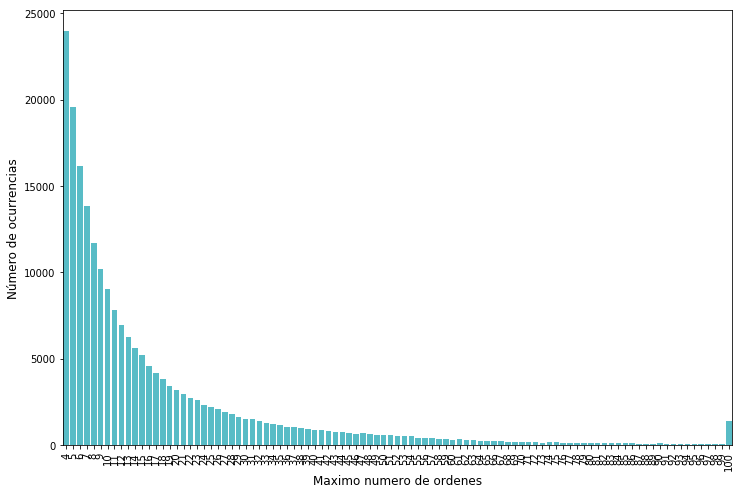

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(order_number_max.index, order_number_max.values, alpha=0.8, color=color[9])
plt.ylabel('Número de ocurrencias', fontsize=12)
plt.xlabel('Maximo numero de ordenes', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

El numero de ordenes por usuario va de 4 a 100

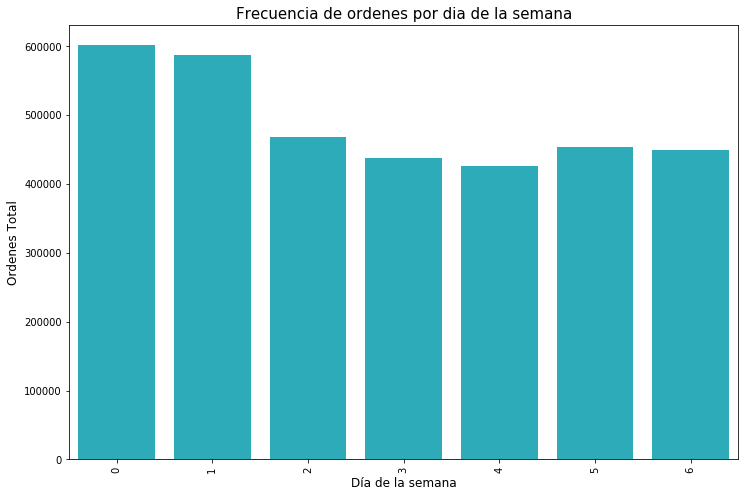

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders, color=color[9])
plt.ylabel('Ordenes Total', fontsize=12)
plt.xlabel('Día de la semana', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frecuencia de ordenes por dia de la semana", fontsize=15)
plt.show()

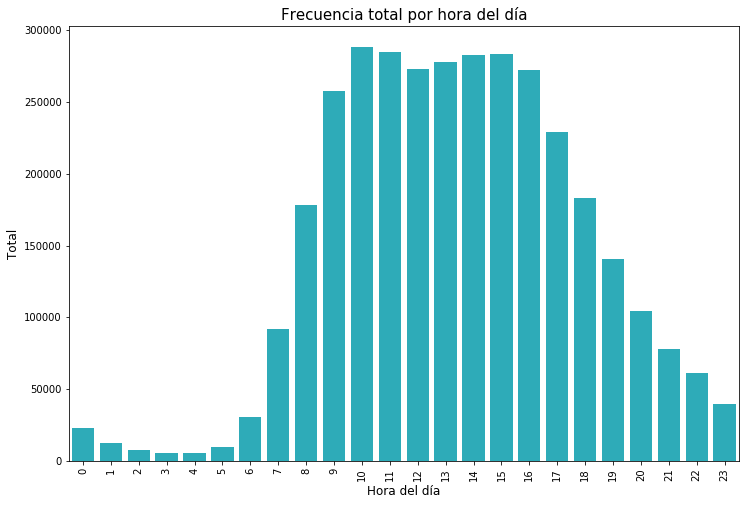

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders, color=color[9])
plt.ylabel('Total', fontsize=12)
plt.xlabel('Hora del día', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frecuencia total por hora del día",fontsize=15)
plt.show()

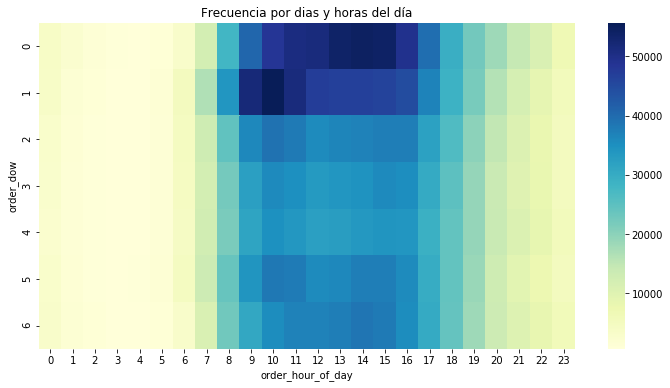

In [29]:
orders_day_hour = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
orders_day_hour = orders_day_hour.pivot('order_dow', 'order_hour_of_day', 'order_number')
plt.figure(figsize=(12,6))
sns.heatmap(orders_day_hour,cmap="YlGnBu")
plt.title("Frecuencia por dias y horas del día")
plt.show()

Se puede apreciar un incremento del consumo los días 0 y 1 (Sabado y domingo) y en general al rededor de las 10 y las 15, además de horas valle entre las 21 y las 6 

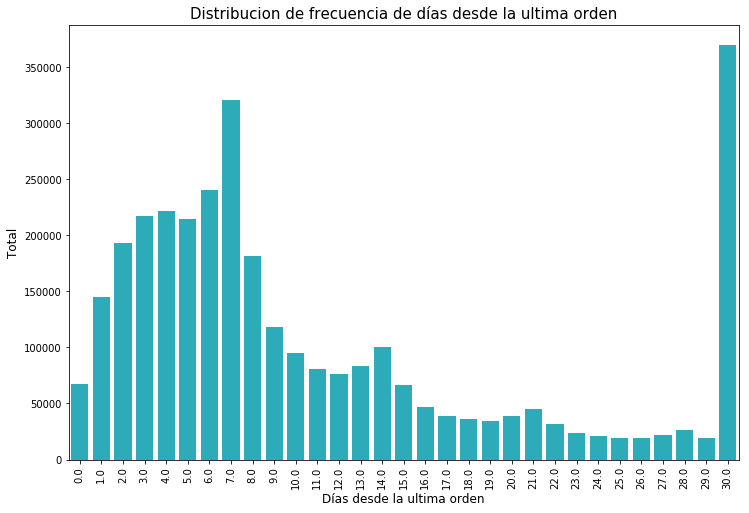

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders, color=color[9])
plt.ylabel('Total', fontsize=12)
plt.xlabel('Días desde la ultima orden', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Distribucion de frecuencia de días desde la ultima orden", fontsize=15)
plt.show()

Hay picos de consumo cada 7 días(7,14,21,28) y en el día 30 

**order_products__*.csv** contiene la lista de los casi 34M productos asociadas a las ordenes y un valor que indica si fue ordenado anteriormente

In [31]:
order_products.shape

(33819106, 4)

In [32]:
order_products.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [33]:
order_products.head(15)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [38]:
max_products = order_products.groupby("order_id")["add_to_cart_order"].aggregate("max")


Las ordenes de 5 articulos son las más comunes

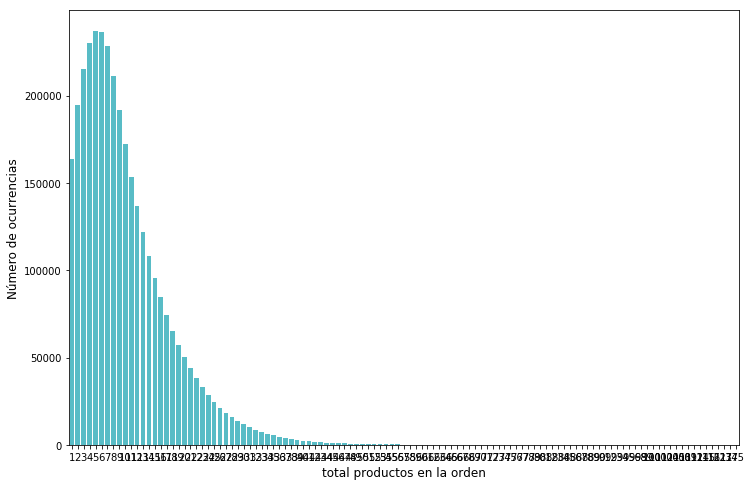

In [36]:
plt.figure(figsize=(12,8))
sns.barplot(max_products.index, max_products.values, alpha=0.8, color=color[9])
plt.ylabel('Número de ocurrencias', fontsize=12)
plt.xlabel('total productos en la orden', fontsize=12)
#plt.xticks(rotation='vertical')
plt.show()

In [120]:
order_products.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [119]:
sum(order_products.reordered)/len(order_products.reordered)

0.5900617242809434

59 % de los productos fueron pedidos en ordenes anteriores

In [45]:
order_products=order_products.merge(products, left_on='product_id',right_on='product_id')

In [125]:
order_products.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'department', 'aisle'],
      dtype='object')

Los productos que más se compran son perecederos (Frutas, Vegetales,etc)

In [142]:
order_products.product_name.value_counts().head(20)

Banana                      491291
Bag of Organic Bananas      394930
Organic Strawberries        275577
Organic Baby Spinach        251705
Organic Hass Avocado        220877
Organic Avocado             184224
Large Lemon                 160792
Strawberries                149445
Limes                       146660
Organic Whole Milk          142813
Organic Raspberries         142603
Organic Yellow Onion        117716
Organic Garlic              113936
Organic Zucchini            109412
Organic Blueberries         105026
Cucumber Kirby               99728
Organic Fuji Apple           92889
Organic Lemon                91251
Organic Grape Tomatoes       88078
Apple Honeycrisp Organic     87272
Name: product_name, dtype: int64

In [144]:
order_products.department.value_counts().head(20)

produce            9888378
dairy eggs         5631067
snacks             3006412
beverages          2804175
frozen             2336858
pantry             1956819
bakery             1225181
canned goods       1114857
deli               1095540
dry goods pasta     905340
household           774652
meat seafood        739238
breakfast           739069
personal care       468693
babies              438743
international       281155
alcohol             159294
pets                102221
missing              77396
other                38086
Name: department, dtype: int64

In [146]:
order_products.aisle.value_counts().head(20)

fresh fruits                     3792661
fresh vegetables                 3568630
packaged vegetables fruits       1843806
yogurt                           1507583
packaged cheese                  1021462
milk                              923659
water seltzer sparkling water     878150
chips pretzels                    753739
soy lactosefree                   664493
bread                             608469
refrigerated                      599109
frozen produce                    545107
ice cream ice                     521101
crackers                          478430
energy granola bars               473835
eggs                              472009
lunch meat                        412087
frozen meals                      408520
baby food formula                 395654
fresh herbs                       393793
Name: aisle, dtype: int64

In [139]:
grouped=order_products.groupby(["order_id"])["reordered"].aggregate("sum")

In [141]:
grouped.value_counts()

0      397115
2      345543
1      343396
3      325774
4      293718
5      256950
6      220682
7      187656
8      158443
9      132098
10     110546
11      92698
12      77764
13      65189
14      55093
15      45942
16      38719
17      32276
18      27014
19      22512
20      18986
21      15845
22      13309
23      11264
24       9548
25       7908
26       6753
27       5577
28       4574
29       3834
        ...  
71          6
67          6
82          5
88          4
69          4
73          3
74          3
75          3
76          3
78          3
86          3
84          3
91          2
93          2
85          2
72          2
80          2
70          2
98          2
97          2
101         1
102         1
100         1
107         1
114         1
87          1
81          1
79          1
77          1
130         1
Name: reordered, Length: 98, dtype: int64

In [44]:
order_products

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [46]:
reorder_by_dept = order_products.groupby(["department"])["reordered"].aggregate("mean").reset_index()


Existen Departamentos con tazas de recompra de más del 60% 

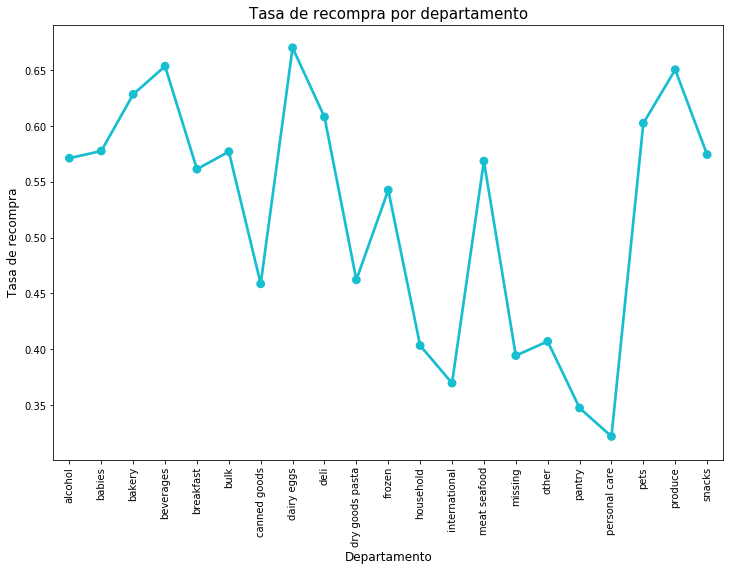

In [86]:
plt.figure(figsize=(12,8))
sns.pointplot(reorder_by_dept['department'].values, reorder_by_dept['reordered'].values, alpha=0.8, color=color[9])
plt.ylabel('Tasa de recompra', fontsize=12)
plt.xlabel('Departamento', fontsize=12)
plt.title("Tasa de recompra por departamento", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


In [48]:
reorder_by_aisle = order_products.groupby(["aisle"])["reordered"].aggregate("mean").reset_index()


In [59]:
reorder_by_aisle=reorder_by_aisle.sort_values(by='reordered',ascending=False)

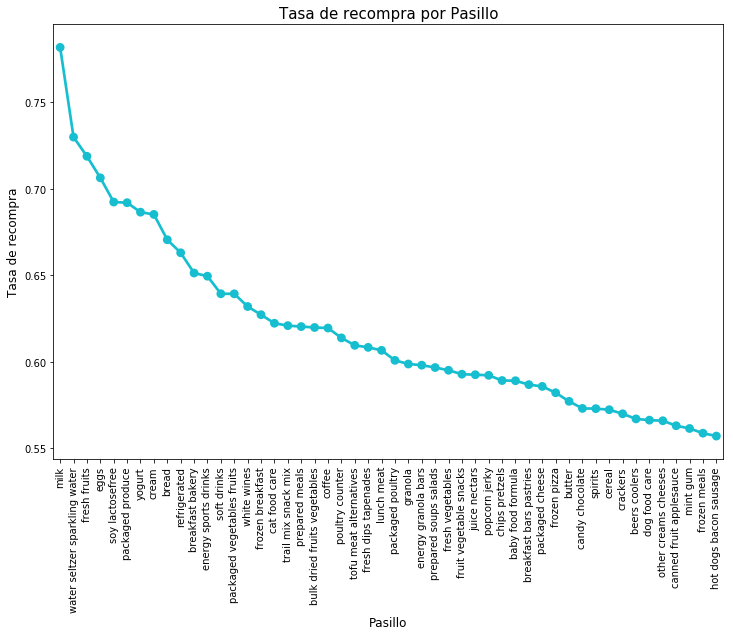

In [85]:
plt.figure(figsize=(12,8))
sns.pointplot(reorder_by_aisle['aisle'].head(50).values, reorder_by_aisle['reordered'].head(50).values, alpha=0.8, color=color[9])
plt.ylabel('Tasa de recompra', fontsize=12)
plt.xlabel('Pasillo', fontsize=12)
plt.title("Tasa de recompra por Pasillo", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

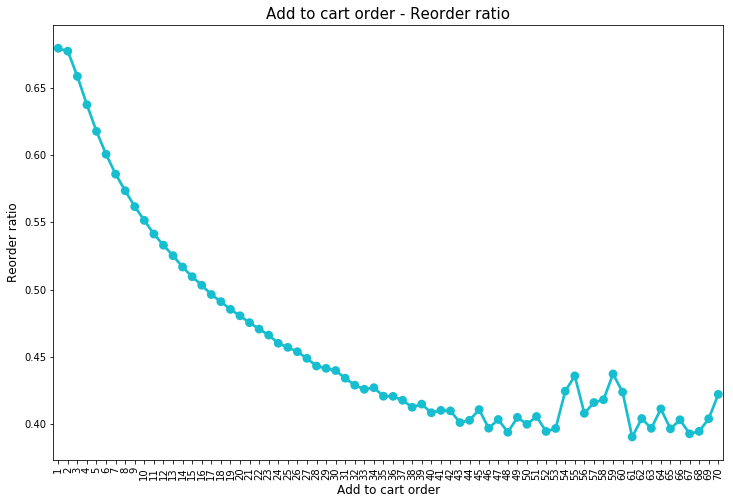

In [84]:
order_reorder = order_products.groupby(["add_to_cart_order"])["reordered"].aggregate("mean")
order_reorder=order_reorder.head(70)

plt.figure(figsize=(12,8))
sns.pointplot(order_reorder.index, order_reorder.values, alpha=0.8, color=color[9])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [70]:
order_products= pd.merge(order_products, orders, on='order_id', how='left')

In [77]:
dow_reorder=order_products.groupby(["order_dow"])["reordered"].aggregate("mean")

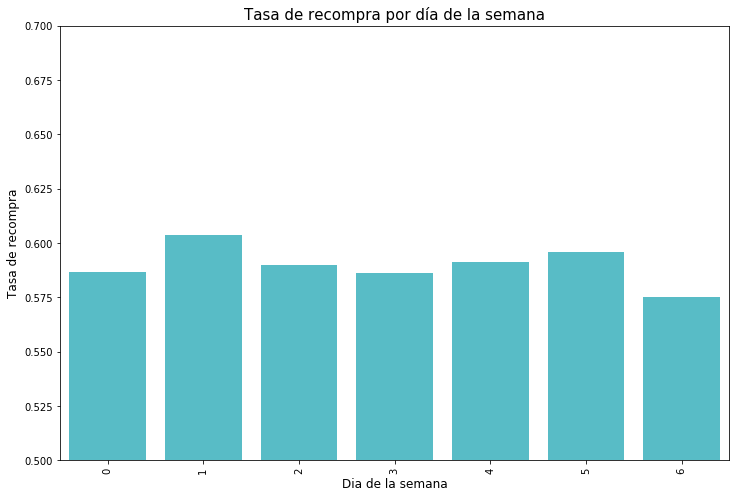

In [83]:
plt.figure(figsize=(12,8))
sns.barplot(dow_reorder.index, dow_reorder.values, alpha=0.8, color=color[9])
plt.ylabel('Tasa de recompra', fontsize=12)
plt.xlabel('Dia de la semana', fontsize=12)
plt.title("Tasa de recompra por día de la semana", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

In [78]:
hod_reorder=order_products.groupby(["order_hour_of_day"])["reordered"].aggregate("mean")

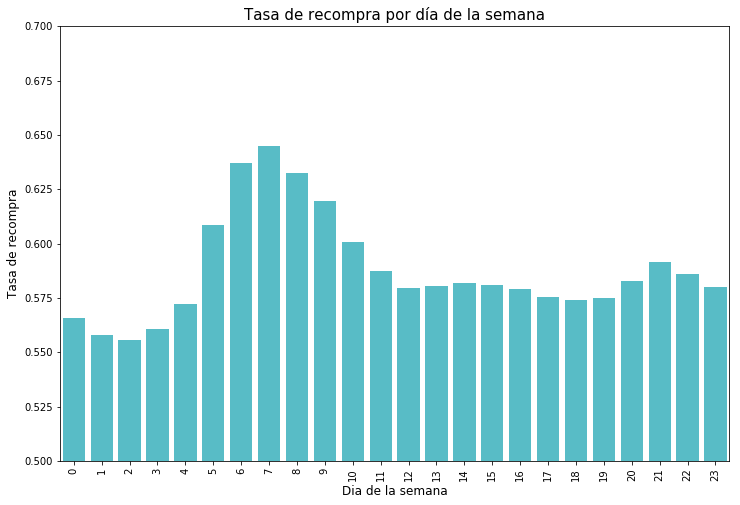

In [82]:
plt.figure(figsize=(12,8))
sns.barplot(hod_reorder.index, hod_reorder.values, alpha=0.8, color=color[9])
plt.ylabel('Tasa de recompra', fontsize=12)
plt.xlabel('Dia de la semana', fontsize=12)
plt.title("Tasa de recompra por día de la semana", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

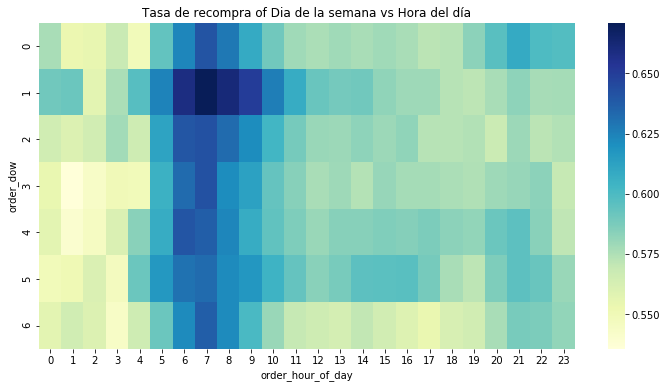

In [194]:
hod_dow_grouped = order_products.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
hod_dow_grouped = hod_dow_grouped.pivot('order_dow', 'order_hour_of_day', 'reordered')
plt.figure(figsize=(12,6))
sns.heatmap(hod_dow_grouped,cmap="YlGnBu")
plt.title("Tasa de recompra of Dia de la semana vs Hora del día")
plt.show()

In [75]:
order_products.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'department', 'aisle',
       'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

#### Aspectos que afectan la recompra de un producto
Se puede ver que los aspectos que más afectan la compra de un producto son el tipo de producto(departamento, pasillo) el momento de la compra(Día de la semana y hora) y el orden en el que se compra.
Existen departamentos con tasas de recompra del 70% o más y pasillos que presentan tasas de recompra muy altas.
Las tasas de recompra más altas del día se presentan alrededor de las 7 AM.
Los productos agregador primero a la orden son los que tienen la tasa de recompra más alta además los primeros 5 productos tienen tasas de recompra de más del 60%



## Segmentacion de clientes

#### Segmentacion usando PCA y K-means Clustering 

In [90]:
order_products.head(3)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs,202279,prior,3,5,9,8.0
1,26,33120,5,0,Organic Egg Whites,86,16,dairy eggs,eggs,153404,prior,2,0,16,7.0
2,120,33120,13,0,Organic Egg Whites,86,16,dairy eggs,eggs,23750,prior,11,6,8,10.0


In [93]:
pivot=pd.pivot_table(order_products,values='order_id',index='user_id',columns='aisle',aggfunc=lambda x: len(x.unique()))

In [95]:
pivot.fillna(0,inplace=True)

In [96]:
pivot

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,9.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0


In [121]:
pca=PCA(n_components=47)
X_pca=pca.fit_transform(pivot)


In [128]:
sum(pca.explained_variance_ratio_[0:47])

0.9003137204962188

In [133]:
aux=pd.DataFrame(X_pca,index=pivot.index)

In [149]:
squared_distances=[]
for k in range(1,50):
    kmeans = MiniBatchKMeans(n_clusters=k).fit(X_pca)
    squared_distances.append(kmeans.inertia_)

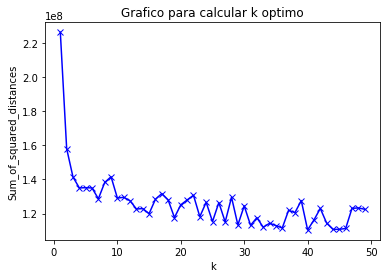

In [150]:
plt.plot(range(1,50), squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Grafico para calcular k optimo')
plt.show()

In [193]:
set(order_products[order_products.department=='pantry'].product_name)

{'Candy Eyeballs',
 'Zero Calorie Sweetener',
 'Red Pepper Mill',
 'Sesame Dressing',
 'Greek Vinaigrette Salad Dressing',
 'Supreme Almond Poppyseed Muffin Mix',
 'Squeeze Grape Jelly',
 'Pure Spanish Saffron',
 'Delights Super Moist Triple Chocolate Fudge Cake Mix',
 'Organic Worcestershire',
 'Medium Thick & Chunky Salsa',
 'Roasted Garlic Extra Virgin Olive Oil',
 'Pure Corn Starch',
 'Bread Crumbs, Italian',
 'Organic Garlic Granules',
 'Original Unflavored Gelatine Mix',
 'Parmesan Croutons Gluten Free',
 'E.V.O.O. Ceasar Vinaigrette Dressing',
 'Unsweetened Cocoa Powder',
 'Red Wine Vinegar, Italian',
 'Basil Leaves',
 'Bar-B-Q All Natural Spice Rue',
 'Organic Tellicherry Black Peppercorns',
 'Pure Peppermint Extract',
 'Miso Dressing',
 'Organic Lemony Herb Salad Dressing',
 'Cilantro',
 'Balsamic Vinegar, of Modena',
 'Organic Star Anise Whole',
 'Expeller Pressed Refined Grapeseed Oil',
 'No Salt Tomato Ketchup',
 'Creamy Chocolate Frosting',
 'Organic Mountain Forest Amber 

In [152]:
 kmeans = MiniBatchKMeans(n_clusters=6).fit_predict(X_pca)

In [153]:
pivot['cluster']=kmeans

array([1, 4, 1, ..., 4, 5, 4])

In [154]:
pivot['cluster']=kmeans

In [187]:
pivot.sample(5)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
202642,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
72052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,1
37674,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,1
172551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,1
10121,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,1


In [183]:
for i in range(6):
    piv_aux=pivot[pivot.cluster==i]
    selector=5<piv_aux.mean()
    print('cluster ',i,':')
    print(piv_aux[selector[selector.values==True].index].mean())
    

cluster  0 :
aisle
bread                             7.532061
chips pretzels                    7.983657
crackers                          5.345715
eggs                              6.177276
fresh fruits                     21.836018
fresh vegetables                 19.363935
frozen produce                    5.473178
ice cream ice                     5.213716
lunch meat                        5.089302
milk                              8.245230
packaged cheese                  10.475837
packaged vegetables fruits       15.616985
refrigerated                      6.100641
soy lactosefree                   7.514076
water seltzer sparkling water     7.993744
yogurt                           10.333438
dtype: float64
cluster  1 :
Series([], dtype: float64)
cluster  2 :
aisle
bread                             8.396534
breakfast bakery                  5.151319
candy chocolate                   5.872995
cereal                            6.686239
chips pretzels                   10.498707
crac

In [184]:
pivot.cluster.value_counts()

1    138364
4     40959
0     12788
5      7110
2      3866
3      3122
Name: cluster, dtype: int64

Se pueden separar los clientes en 6 grandes grupos.
El **grupo 0** presenta un alto consumo de productos para el desayuno, frutas y vegetales frescos, leche, yogurt, queso pan, huevos, etc... y algunos productos congelados.(12788 Clientes)

El **grupo 1** es el grupo más grande y esta conformado por aquiellos clientes que no presentan habitos de consumo fuertes y clientes poco habituales. (138364 Clientes)

El **grupo 2** presenta un alto consumo de bebidas e ingredientes para bebidas, frutas, verduras y acompañamientos,Pan, Galletas, nueces (3866 Clientes)

El **grupo 3**  Son el grupo que presenta consumos más variados de productos (Una canasta basica completa), entre ellos el "baby formula" es muy probable que sean personas cabeza de familia además son los clientes con consumos más altos en frutas y verduras.(3122 Clientes)

El **grupo 4** presenta consumos similares a los del grupo 0 sin embargo en una proporcion y frecuencia mucho menor.(40959 Clientes)

El **grupo 5** presenta consumos altos de ingredientes de desayunos y almuerzos ya que incluyeenlatados, sopas y carnes. Además de vegetales frutas y verduras.(7110 Clientes)
